# **LTFS Data Science FinHack 2**

## **Problem statement**

LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

We have been appointed with the task of forecasting daily cases for **next 3 months for 2 different business segments** at the **country level** keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc. (We are free to use any publicly available open source external datasets). Some other examples could be:

 + Weather
 + Macroeconomic variables

we also note that the external dataset must belong to a reliable source.

## **Data Dictionary**

The train data has been provided in the following way:

 + For business segment 1, historical data has been made available at branch ID level
 + For business segment 2, historical data has been made available at State level.
 

## **Train File**

|Variable|	Definition|
|:------:|:----------:|
|application_date|Date of application|
|application_date|	Date of application|
|segment|	Business Segment (1/2)|
|branch_id|	Anonymised id for branch at which application was received|
|state|	State in which application was received (Karnataka, MP etc.)|
|zone|	Zone of state in which application was received (Central, East etc.)|
|case_count|	(Target) Number of cases/applications received|

## **Additional data**

We have sourced holidays data from this [link](https://www.calendarlabs.com/holidays/india/2019).It contains below columns

|Variable|	Definition|
|:------:|:----------:|
|DAY|	Name of day on which holiday occurs|
|DATE| Date on which holiday occurs|
| HOLIDAY|	Name of Holiday|

## **Test File**

Forecasting needs to be done at country level for the dates provided in test set for each segment.

|Variable|	Definition|
|:------:|:----------:|
|id|	Unique id for each sample in test set|
|application_date|	Date of application|
| segment|	Business Segment (1/2)|

## **Evaluation**

**Evaluation Metric**

The evaluation metric for scoring the forecasts is MAPE (Mean Absolute Percentage Error) M with the formula:

$$M = \frac{100}{n}\sum_{t = 1}^{n}|\frac{A_t - F_t}{A_t}|$$
 
Where $A_t$ is the actual value and $F_t$ is the forecast value.


The Final score is calculated using $MAPE$ for both the segments using the formula:

$Final Score = 0.5*MAPE_{Segment1} + 0.5*MAPE_{Segment2}$


## **Getting started**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Reading data**

In [0]:
# Setting the path
import os
path = "/content/drive/My Drive/Colab Notebooks (1)/LTFS Data Science FinHack 2"
os.chdir(path)

In [0]:
# Importing the dataset
train = pd.read_csv("./Input/train_fwYjLYX.csv")
holidays = pd.read_csv("./Input/holiday_list_2017_2018_2019.csv")
test = pd.read_csv("./Input/test_1eLl9Yf.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_IIzFVsf.csv")

## **Data Preprocessing**

In [5]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.00,WEST BENGAL,EAST,40.00
1,2017-04-03,1,1.00,WEST BENGAL,EAST,5.00
2,2017-04-04,1,1.00,WEST BENGAL,EAST,4.00
3,2017-04-05,1,1.00,WEST BENGAL,EAST,113.00
4,2017-04-07,1,1.00,WEST BENGAL,EAST,76.00


In [6]:
# Data preprocessing function
train_v2 = pd.DataFrame(train.groupby(['application_date', 'segment'])['case_count'].sum()).reset_index()
train_v2.head()

,application_date,segment,case_count
0,2017-04-01,1,299.00
1,2017-04-01,2,897.00
2,2017-04-02,2,605.00
3,2017-04-03,1,42.00
4,2017-04-03,2,2016.00


In [7]:
holidays.head()

,DAY,DATE,HOLIDAY
0,Sunday,01-Jan-17,New Year's Day
1,Saturday,14-Jan-17,Makar Sankranti / Pongal
2,Thursday,26-Jan-17,Republic Day
3,Friday,24-Feb-17,Maha Shivaratri
4,Monday,13-Mar-17,Holi


In [8]:
holidays['application_date'] = pd.to_datetime(holidays['DATE'])
holidays = holidays[['application_date', 'HOLIDAY']]
holidays.head()

,application_date,HOLIDAY
0,2017-01-01,New Year's Day
1,2017-01-14,Makar Sankranti / Pongal
2,2017-01-26,Republic Day
3,2017-02-24,Maha Shivaratri
4,2017-03-13,Holi


In [9]:
print(holidays[holidays['HOLIDAY'].str.contains('Diwali')])
print(holidays[holidays['HOLIDAY'].str.contains('Dus')])

   application_date             HOLIDAY
22       2017-10-19  Diwali / Deepavali
47       2018-11-07  Diwali / Deepavali
73       2019-10-27  Diwali / Deepavali
   application_date            HOLIDAY
19       2017-09-30  Dussehra / Dasara
46       2018-10-19  Dussehra / Dasara
72       2019-10-08  Dussehra / Dasara


In [10]:
Diwali_HOLIDAY = pd.DataFrame()
diwali = ["2017-10-17", "2017-10-18", "2017-10-19", "2017-10-20", "2017-10-21",
          "2018-11-05", "2018-11-06", "2018-11-07", "2018-11-08", "2018-11-09",
          "2019-10-25", "2019-10-26", "2019-10-27", "2019-10-28", "2019-10-29"]

Diwali_HOLIDAY['application_date'] = diwali
Diwali_HOLIDAY['application_date'] = pd.to_datetime(Diwali_HOLIDAY['application_date'])
Diwali_HOLIDAY['Diwali_HOLIDAY'] = 1
# temp
print(Diwali_HOLIDAY)

Dussehra_HOLIDAY = pd.DataFrame()
Dussehra = ["2017-09-22","2017-09-23","2017-09-24", "2017-09-25", "2017-09-26",
            "2017-09-27", "2017-09-28", "2017-09-29", "2017-09-30",
            "2018-10-11", "2018-10-12", "2018-10-13", "2018-10-14", "2018-10-15",
            "2018-10-16", "2018-10-17", "2018-10-18", "2018-10-19",
            "2019-09-30", "2019-10-01", "2019-10-02", "2019-10-03", "2019-10-04",
            "2019-10-05", "2019-10-06", "2019-10-07", "2019-10-08"]

Dussehra_HOLIDAY['application_date'] = Dussehra
Dussehra_HOLIDAY['application_date'] = pd.to_datetime(Dussehra_HOLIDAY['application_date'])
Dussehra_HOLIDAY['Dussehra_HOLIDAY'] = 1
# temp
print(Dussehra_HOLIDAY)

   application_date  Diwali_HOLIDAY
0        2017-10-17               1
1        2017-10-18               1
2        2017-10-19               1
3        2017-10-20               1
4        2017-10-21               1
5        2018-11-05               1
6        2018-11-06               1
7        2018-11-07               1
8        2018-11-08               1
9        2018-11-09               1
10       2019-10-25               1
11       2019-10-26               1
12       2019-10-27               1
13       2019-10-28               1
14       2019-10-29               1
   application_date  Dussehra_HOLIDAY
0        2017-09-22                 1
1        2017-09-23                 1
2        2017-09-24                 1
3        2017-09-25                 1
4        2017-09-26                 1
5        2017-09-27                 1
6        2017-09-28                 1
7        2017-09-29                 1
8        2017-09-30                 1
9        2018-10-11                 1
10    

## **Exploratory data analysis**

### **Glimpse of data**

In [11]:
# Shape of data
print("Shape of training data :", train_v2.shape)

Shape of training data : (1650, 3)


In [12]:
# Top 5 rows
train_v2.head()

,application_date,segment,case_count
0,2017-04-01,1,299.00
1,2017-04-01,2,897.00
2,2017-04-02,2,605.00
3,2017-04-03,1,42.00
4,2017-04-03,2,2016.00


In [13]:
## Info of data
train_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
application_date    1650 non-null object
segment             1650 non-null int64
case_count          1650 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.8+ KB


### **Univariate analysis**

#### **Target variable**

In [14]:
train_v2['case_count'].describe()

count    1650.00
mean     9038.25
std      9660.13
min         1.00
25%      2415.50
50%      3933.50
75%     13872.00
max     43340.00
Name: case_count, dtype: float64

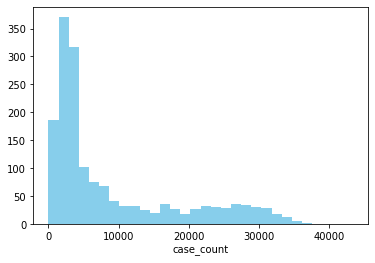

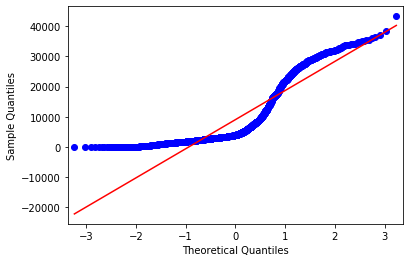

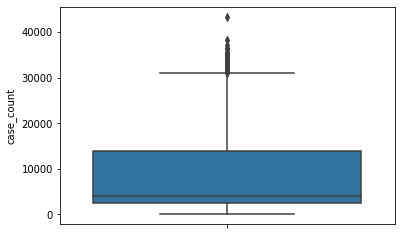

In [15]:
#sns.distplot(train_v2['case_count']);
sns.distplot(train_v2['case_count'],
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});

from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(train_v2['case_count'], line='s')
plt.show()

# boxplot
sns.boxplot(y = train_v2['case_count']);

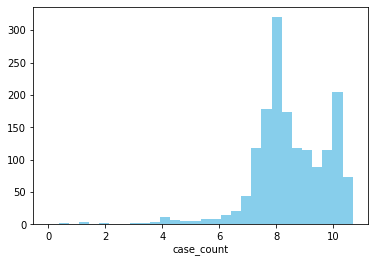

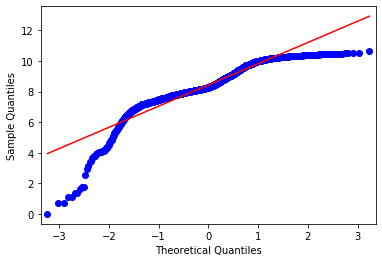

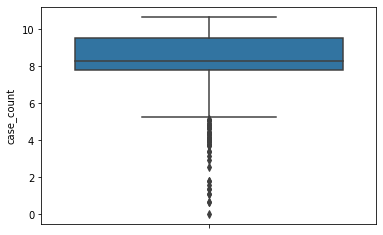

In [16]:
sns.distplot(np.log(train_v2['case_count']),
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1});

from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(np.log(train_v2['case_count']), line='s')
plt.show()

# boxplot
sns.boxplot(y = np.log(train_v2['case_count']));

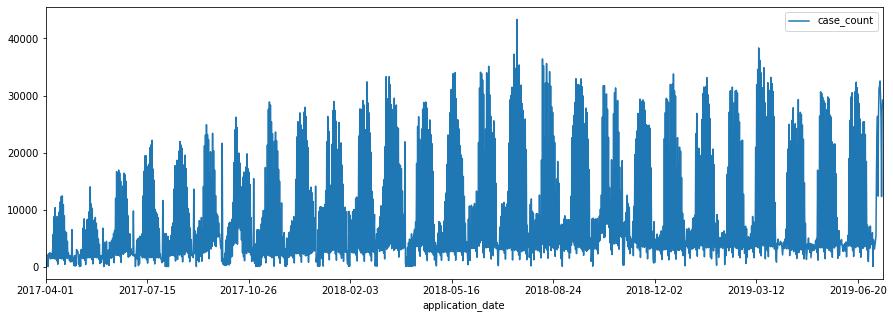

In [17]:
train_v2.drop(['segment'], axis = 1).set_index('application_date').plot(figsize = (15,5));

### **Bivariate analysis**

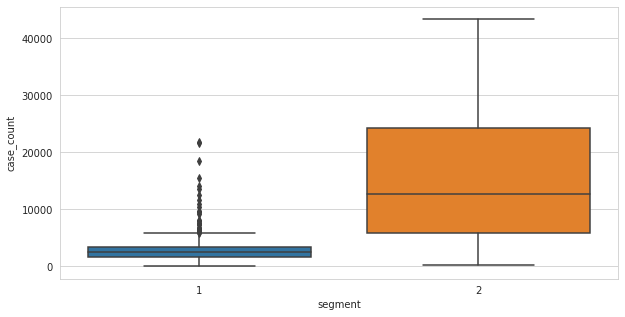

In [18]:
# Function for freq summary
cat_cols = ['segment']
def plot_box(data, cols, col_y = 'case_count'):
    for col in cols:
      fig = plt.figure(figsize=(10,5))
      sns.set_style("whitegrid")
      sns.boxplot(col, col_y, data=data)
      plt.xlabel(col) # Set text for the x axis
      plt.ylabel(col_y)# Set text for y axis
      plt.show()
        
plot_box(train_v2, cat_cols)

In [0]:
# import scipy.stats as st
# def get_best_distribution(data):
#     dist_names = ["norm", "gamma", "lognorm", "expon", "exponweib", "weibull_max", "weibull_min", 
#                   "pareto", "genextreme"]
#     dist_results = []
#     params = {}
#     for dist_name in dist_names:
#         dist = getattr(st, dist_name)
#         param = dist.fit(data)

#         params[dist_name] = param
#         # Applying the Kolmogorov-Smirnov test
#         D, p = st.kstest(data, dist_name, args=param)
#         print("p value for "+dist_name+" = "+str(p))
#         dist_results.append((dist_name, p))

#     # select the best fitted distribution
#     best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
#     # store the name of the best fit and its p value

#     print("Best fitting distribution: "+str(best_dist))
#     print("Best p value: "+ str(best_p))
#     print("Parameters for the best fit: "+ str(params[best_dist]))

#     return best_dist, best_p, params[best_dist]

# get_best_distribution(train_v2['case_count'])

In [20]:
train_v2.groupby('segment')['case_count'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
1,806.00,2714.69,2042.42,1.00,1633.25,2602.00,3333.00,21885.00
2,844.00,15077.10,10188.90,206.00,5946.00,12679.00,24217.25,43340.00


## **Feature engineering**

In [0]:
def feature_eng(train_v2):
    train_v2['application_date'] = pd.to_datetime(train_v2['application_date'])

    train_v2 = pd.merge(train_v2, holidays, on = 'application_date', how = 'left')
    train_v2['HOLIDAY'] = train_v2['HOLIDAY'].fillna('Non-Holiday')
    train_v2['Holiday_flag'] = np.where(train_v2['HOLIDAY'] == 'Non-Holiday', 0, 1)

    train_v2 = pd.merge(train_v2, Diwali_HOLIDAY, on = 'application_date', how = 'left')
    train_v2['Diwali_HOLIDAY'] = train_v2['Diwali_HOLIDAY'].fillna(0)

    train_v2 = pd.merge(train_v2, Dussehra_HOLIDAY, on = 'application_date', how = 'left')
    train_v2['Dussehra_HOLIDAY'] = train_v2['Dussehra_HOLIDAY'].fillna(0)

    train_v2['year'] = train_v2['application_date'].dt.year
    train_v2['Month'] = train_v2['application_date'].dt.month
    train_v2['Date'] = train_v2['application_date'].dt.day
    train_v2['weekday'] = train_v2['application_date'].dt.weekday_name

    Seasons = {6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
               10: 'Winter', 11: 'Winter', 12: 'Winter', 1: 'Winter',
               2: 'Summer', 3: 'Summer', 4: 'Summer', 5: 'Summer'}
  
    train_v2['Seasons'] = train_v2['Month'].map(Seasons)

    train_v2['segment'] = np.where(train_v2['segment'] == 1, 1, 0)

    Month_Index = {4: 0.5, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 1: 1, 2: 1, 3: 1.5}

    train_v2['Month_Index'] = train_v2['Month'].map(Month_Index)

    Date_index = {1 : 0.5,2 : 0.5,3 : 0.5,4 : 0.5,5 : 0.5,6 : 0.5,7 : 0.5,8 : 0.5,9 : 0.5,10 : 0.5,
                  11 : 1,12 : 1,13 : 1.5,14 : 1.5,15 : 1.5,16 : 1.5,17 : 1.5,18 : 1.5,19 : 1.5,20 : 1.5,21 : 1.5,
                  22 : 1.5,23 : 1,24 : 1,25 : 1,26 : 1,27 : 1,28 : 1,29 : 0.5,30 : 0.5,31 : 0.5}

    train_v2['Date_index'] = train_v2['Date'].map(Date_index)

    dummy_col = ['weekday', 'Seasons']
    temp = train_v2[dummy_col]
    temp = pd.get_dummies(temp)

    train_v2 = train_v2.drop(dummy_col, axis = 1)
    train_v2 = pd.concat([train_v2, temp], axis = 1)

    train_v2 = train_v2.drop(['application_date','HOLIDAY'], axis = 1)
  
    return train_v2

In [22]:
train_v2 = feature_eng(train_v2)
train_v2.head()

,segment,case_count,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,299.00,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
1,0,897.00,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
2,0,605.00,0,0.00,0.00,2017,4,2,0.50,0.50,0,0,0,1,0,0,0,0,1,0
3,1,42.00,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0
4,0,2016.00,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0


## **Machine Learning**

### **Creating X and y**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
X_train = train_v2.drop(['case_count'], axis = 1)
y_train = np.log(train_v2['case_count'])
#y_train = Train['case_count']

print("Shape of features :", X_train.shape)
print("Shape of labels :", y_train.shape)

X_train.head()

Shape of features : (1650, 19)
Shape of labels : (1650,)


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
1,0,0,0.00,0.00,2017,4,1,0.50,0.50,0,0,1,0,0,0,0,0,1,0
2,0,0,0.00,0.00,2017,4,2,0.50,0.50,0,0,0,1,0,0,0,0,1,0
3,1,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0
4,0,0,0.00,0.00,2017,4,3,0.50,0.50,0,1,0,0,0,0,0,0,1,0


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

### **Model evualuation**

Using TensorFlow backend.


Building model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               4000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)         

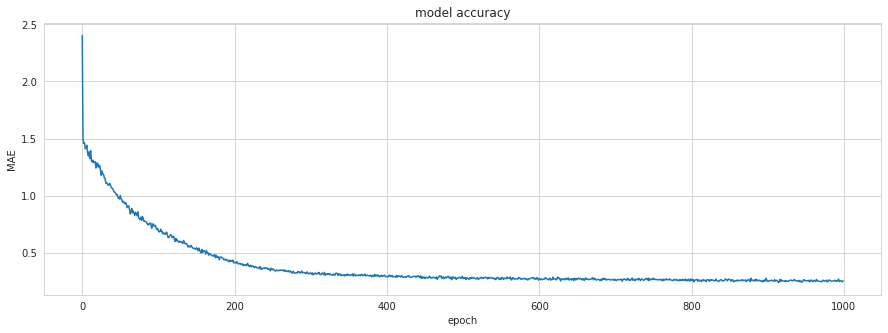

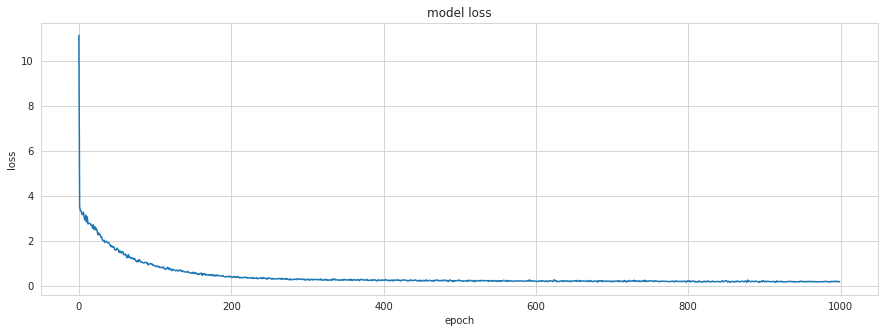

In [26]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, LSTM
from keras import regularizers, optimizers
from keras.optimizers import SGD, Adam, RMSprop

#Start Neural Network
def dnn_model():
  print('Building model...')
  input_shape = 19
  model = Sequential()
  model.add(Dense(output_dim = 200, init = 'uniform', activation = 'relu', input_dim = input_shape))
  model.add(Dropout(0.2))
  model.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(output_dim = 50, init = 'uniform', activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu'))
  model.add(Dropout(0.2))
  
  #Final layer
  model.add(Dense(units = 1))
  
  #Model Compilation
  opt = RMSprop(lr=0.001)  # Optimizer
  model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])
  print(model.summary())
  return model

EPOCH_COUNT = 1000

def train_model(X_train, y_train):
  model = dnn_model()
  #checkpoint_callback = ModelCheckpoint('./Code/lstm1.h5', monitor='val_mae', verbose=1,save_best_only=True, mode='min')
  #reducelr_callback = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=5, min_delta=0.01,verbose=1)
  #callbacks_list = [checkpoint_callback, reducelr_callback]
	# Fit the model and get training history.
  print('Training...')
  history = model.fit(X_train, y_train, 
                      epochs = EPOCH_COUNT, 
                      batch_size = 15)
  return model, history

def show_summary_stats(history):
  # List all data in history
  print(history.history.keys())
  # Summarize history for accuracy
  plt.figure(figsize=(15,5))
  plt.plot(history.history['mean_absolute_error'])
  #plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Summarize history for loss
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

model, history  = train_model(X_train, y_train)
show_summary_stats(history)

## **Predicting test data**

In [27]:
test = pd.read_csv("./Input/test_1eLl9Yf.csv")
test_v2 = test.drop(['id'], axis = 1)
test_v2 = feature_eng(test_v2)
test_col = test_v2.columns
test_v2 = test_v2.drop_duplicates()
print("Shape of features :", test_v2.shape)

Shape of features : (180, 18)


In [28]:
feature_list = train_v2.drop(['case_count'], axis = 1).columns.tolist()
dummy_add = list(set(feature_list) - set(test_col))
print(dummy_add)

for newcol in dummy_add:
    test_v2[newcol] = 0

test_v2 = test_v2[feature_list]
test_v2.head()

['Seasons_Summer']


,segment,Holiday_flag,Diwali_HOLIDAY,Dussehra_HOLIDAY,year,Month,Date,Month_Index,Date_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Seasons_Monsoon,Seasons_Summer,Seasons_Winter
0,1,0,0.00,0.00,2019,7,6,1.00,0.50,0,0,1,0,0,0,0,1,0,0
1,1,0,0.00,0.00,2019,7,7,1.00,0.50,0,0,0,1,0,0,0,1,0,0
2,1,0,0.00,0.00,2019,7,8,1.00,0.50,0,1,0,0,0,0,0,1,0,0
3,1,0,0.00,0.00,2019,7,9,1.00,0.50,0,0,0,0,0,1,0,1,0,0
4,1,0,0.00,0.00,2019,7,10,1.00,0.50,0,0,0,0,0,0,1,1,0,0


In [29]:
test_v2 = sc.transform(test_v2)
test['case_count'] = np.exp(model.predict(test_v2))
test['case_count'] = test['case_count'].round(0)
test.head()

,id,application_date,segment,case_count
0,1,2019-07-06,1,2374.00
1,2,2019-07-07,1,1650.00
2,3,2019-07-08,1,4018.00
3,4,2019-07-09,1,3507.00
4,5,2019-07-10,1,3451.00


In [0]:
Submission = test[['id', 'application_date', 'segment', 'case_count']]

Submission.to_csv("./Output/Submission_DNN_v1.csv", index = False)